# ENTREGABLE 1

INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64


In [34]:
# Eliminar filas con cualquier valor faltante
df_dropped_rows = data.dropna()

print(df_dropped_rows.shape)

(45207, 17)


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [13]:
# Lista de columnas categóricas en tu dataset
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Descripción específica para columnas categóricas
data[categorical_columns].describe()


,job,marital,education,default,housing,loan,contact,month,poutcome
count,45213,45214,45214,45215,45215,45215,45215,45215,45215
unique,18,6,10,2,2,6,5,12,6
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9731,27215,23197,44399,25132,37962,29285,13768,36958


Todas las columnas categóricas tienen más de 1 subnivel (unique). No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [30]:
# Identificar todas las filas duplicadas (todas menos la primera aparición)
duplicated_rows = df_dropped_rows[df_dropped_rows.duplicated()]

print(duplicated_rows)

       age          job   marital  education default  balance housing loan  \
1201    43  blue-collar   married  secondary     yes     -7.0      no   no   
36438   29   technician    single   tertiary      no  18254.0      no   no   
45197   59   management   married   tertiary      no    138.0     yes  yes   
45203   52   technician  divorced  secondary      no   1005.0     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
1201    unknown    8   may      70.0         1   -1.0         0  unknown   no  
36438  cellular   11   may     279.0         2   -1.0         0  unknown   no  
45197  cellular   16   nov     162.0         2  187.0         5  failure   no  
45203  cellular    2   jun     195.0         1   -1.0         0  unknown  yes  


In [31]:
num_duplicated_rows = len(duplicated_rows)
print(f"Número de filas duplicadas: {num_duplicated_rows}")

Número de filas duplicadas: 4


In [32]:
df_sin_duplicados = df_dropped_rows.drop_duplicates()

print(df_sin_duplicados)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45210   51    technician   married   tertiary      no    825.0      no   no   
45211   71       retired  divorced    primary      no   1729.0      no   no   
45212   72       retired   married  secondary      no   5715.0      no   no   
45213   57   blue-collar   married  secondary      no    668.0      no   no   
45214   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pd

##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


In [35]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_sin_duplicados.select_dtypes(include=['int64', 'float64'])

# Estadísticos Descriptivos

numeric_columns.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,41.005177,1373.893967,15.807115,258.039754,2.763843,40.177709,0.580138
std,12.037387,3923.852086,8.323018,257.470045,3.098168,100.104768,2.303344
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


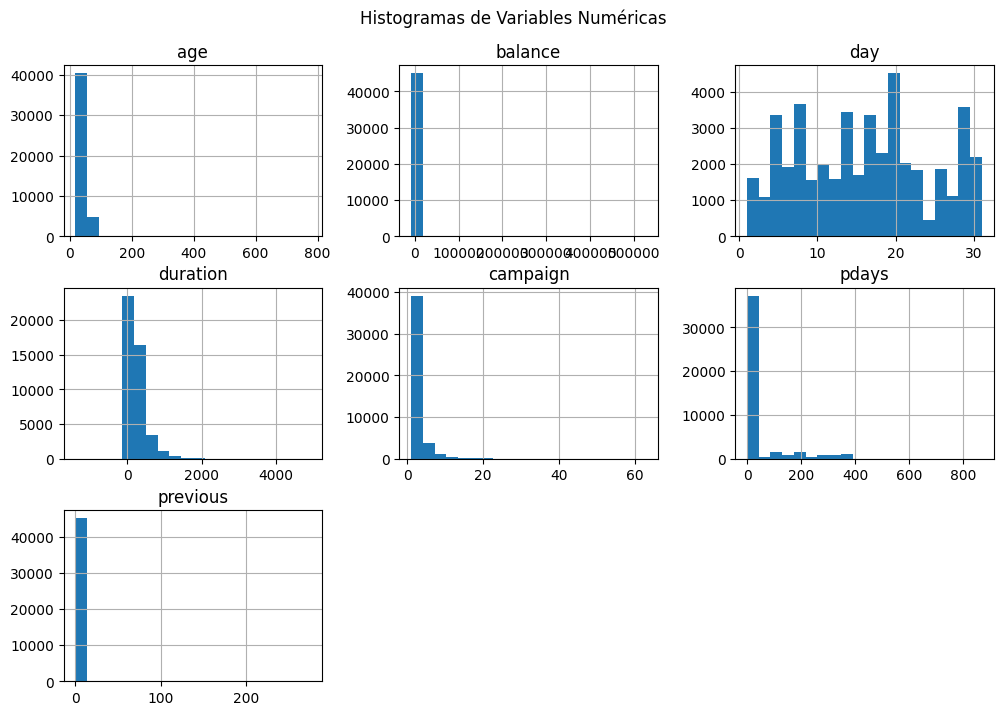

In [36]:
# Histogramas
numeric_columns.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histogramas de Variables Numéricas", y=0.95)
plt.show()

##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [37]:
# Obtener todas las variables categóricas
columnas_categoricas = df_sin_duplicados.select_dtypes(include=['object'])

# Iterar sobre cada columna categórica y obtener los valores únicos
for columna in columnas_categoricas:
    valores_unicos = df_sin_duplicados[columna].unique()
    print(f"Valores únicos para '{columna}':")
    print(valores_unicos)

Valores únicos para 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']
Valores únicos para 'marital':
['married' 'single' 'div.' 'divorced' 'DIVORCED' 'Single']
Valores únicos para 'education':
['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK']
Valores únicos para 'default':
['no' 'yes']
Valores únicos para 'housing':
['yes' 'no']
Valores únicos para 'loan':
['no' 'yes' 'No' 'YES' 'Yes' 'NO']
Valores únicos para 'contact':
['unknown' 'cellular' 'telephone' 'phone' 'mobile']
Valores únicos para 'month':
['may' 'nov' 'jun' 'jul' 'aug' 'oct' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Valores únicos para 'poutcome':
['unknown' 'UNK' 'failure' 'other' 'success' 'Success']
Valores únicos para 'y':
['no' 'yes']


In [38]:
# Unificar los valores de 'job'
df_sin_duplicados['job'] = df_sin_duplicados['job'].replace(['Management', 'MANAGEMENT'], 'management')
df_sin_duplicados['job'] = df_sin_duplicados['job'].replace(['Self-employed', 'entrepreneur'], 'self-employed')
df_sin_duplicados['job'] = df_sin_duplicados['job'].replace(['Retired'], 'retired')
df_sin_duplicados['job'] = df_sin_duplicados['job'].replace(['Services'], 'services')
df_sin_duplicados['job'] = df_sin_duplicados['job'].replace(['admin.'], 'administrative')
df_sin_duplicados['job'] = df_sin_duplicados['job'].replace(['blue-collar'], 'unknown')

# Verificar los valores únicos después de la unificación
valores_unicos_job = df_sin_duplicados['job'].unique()
print("Valores únicos para 'job' después de la unificación:")
print(valores_unicos_job)

Valores únicos para 'job' después de la unificación:
['management' 'technician' 'self-employed' 'unknown' 'retired'
 'administrative' 'services' 'unemployed' 'housemaid' 'student']


In [39]:
df_sin_duplicados['marital'] = df_sin_duplicados['marital'].replace(['div.', 'DIVORCED'], 'divorced')
df_sin_duplicados['marital'] = df_sin_duplicados['marital'].replace(['Single'], 'single')

valores_unicos_marital = df_sin_duplicados['marital'].unique()
print("Valores únicos para 'marital' después de la unificación:")
print(valores_unicos_marital)

Valores únicos para 'marital' después de la unificación:
['married' 'single' 'divorced']


In [40]:
df_sin_duplicados['education'] = df_sin_duplicados['education'].replace(['SECONDARY', 'Secondary', 'sec.'], 'secondary')
df_sin_duplicados['education'] = df_sin_duplicados['education'].replace(['Primary'], 'primary')
df_sin_duplicados['education'] = df_sin_duplicados['education'].replace(['Tertiary'], 'tertiary')
df_sin_duplicados['education'] = df_sin_duplicados['education'].replace(['UNK'], 'unknown')

valores_unicos_education = df_sin_duplicados['education'].unique()
print("Valores únicos para 'education' después de la unificación:")
print(valores_unicos_education)

Valores únicos para 'education' después de la unificación:
['tertiary' 'secondary' 'unknown' 'primary']


In [41]:
df_sin_duplicados['loan'] = df_sin_duplicados['loan'].replace(['NO', 'No'], 'no')
df_sin_duplicados['loan'] = df_sin_duplicados['loan'].replace(['YES', 'Yes'], 'yes')

valores_unicos_loan = df_sin_duplicados['loan'].unique()
print("Valores únicos para 'loan' después de la unificación:")
print(valores_unicos_loan)

Valores únicos para 'loan' después de la unificación:
['no' 'yes']


In [43]:
df_sin_duplicados['contact'] = df_sin_duplicados['contact'].replace(['cellular', 'telephone', 'mobile'], 'phone')

valores_unicos_contact = df_sin_duplicados['contact'].unique()
print("Valores únicos para 'contact' después de la unificación:")
print(valores_unicos_contact)

Valores únicos para 'contact' después de la unificación:
['unknown' 'phone']


In [44]:
df_sin_duplicados['poutcome'] = df_sin_duplicados['poutcome'].replace(['Success'], 'success')
df_sin_duplicados['poutcome'] = df_sin_duplicados['poutcome'].replace(['UNK', 'other'], 'unknown')

valores_unicos_poutcome = df_sin_duplicados['poutcome'].unique()
print("Valores únicos para 'poutcome' después de la unificación:")
print(valores_unicos_poutcome)

Valores únicos para 'poutcome' después de la unificación:
['unknown' 'failure' 'success']


## Conclusiones

In [45]:
df_sin_duplicados.to_csv(ruta, index=False)